<a href="https://colab.research.google.com/github/avonthikaa/Mental_Health_Dashboard/blob/main/PREPEOCESSING_AND_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRAIN.CSV (EDA BEFORE CLEANING)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("/content/traincsv.csv",low_memory= False)

In [5]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB
None
        Customer_ID
count  7.741530e+05
mean   1.038708e+07
std    2.234795e+05
min    1.000000e+07
25%    1.019354e+07
50%    1.038708e+07
75%    1.058062e+07
max    1.077415e+07


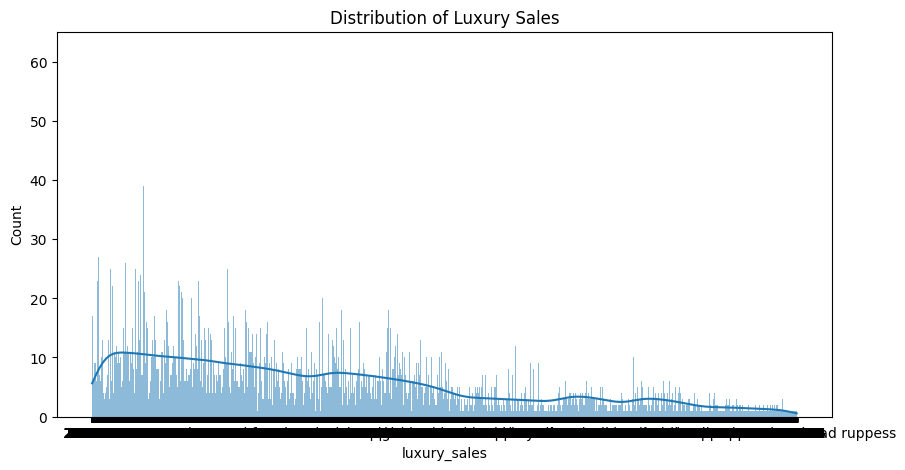

In [6]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['luxury_sales'], bins=20, kde=True)
plt.title("Distribution of Luxury Sales")
plt.show()

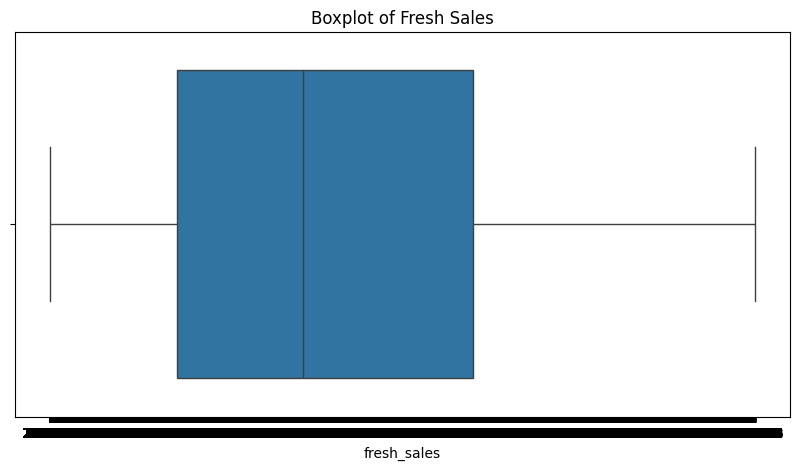

In [7]:
# Convert 'fresh_sales' column to numeric, handling errors
def convert_to_numeric(value):
    try:
        # Attempt to convert directly to numeric
        return pd.to_numeric(value)
    except ValueError:
        # If conversion fails, try removing non-numeric characters and convert
        cleaned_value = ''.join(filter(str.isdigit, str(value)))
        if cleaned_value:
            return pd.to_numeric(cleaned_value)
        else:
            # If no numeric characters found, return NaN
            return float('nan')

df['fresh_sales_numeric'] = df['fresh_sales'].apply(convert_to_numeric)

# Drop rows with NaN values in the new numeric column if necessary
df.dropna(subset=['fresh_sales_numeric'], inplace=True)

# Now create the boxplot using the numeric column
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fresh_sales'])
plt.title("Boxplot of Fresh Sales")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


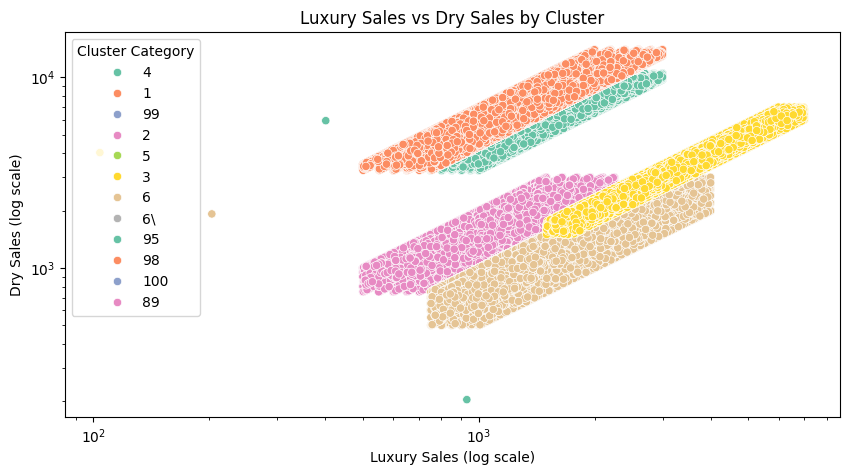

In [8]:
#bivariate analysis

# Function to convert sales strings to numeric values
def convert_sales_to_numeric(value):
    word_to_num = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
        'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14,
        'fifteen': 15, 'sixteen': 16, 'seventeen': 17, 'eighteen': 18,
        'nineteen': 19, 'twenty': 20, 'thirty': 30, 'forty': 40,
        'fifty': 50, 'sixty': 60, 'seventy': 70, 'eighty': 80,
        'ninety': 90, 'hundred': 100, 'thousand': 1000,
        'rupees': 1,  # Treat "rupees" as 1 for simplicity
        'hundread': 100  # Correct the typo
    }

    try:
        return pd.to_numeric(value)
    except (ValueError, TypeError):
        words = str(value).lower().replace("and", "").split()
        total, current_num = 0, 0

        for word in words:
            if word in word_to_num:
                num = word_to_num[word]
                if num in {100, 1000}:
                    current_num *= num
                else:
                    current_num += num
            else:
                total += current_num
                current_num = 0

        total += current_num
        return total

# Apply conversion
df['luxury_sales'] = df['luxury_sales'].apply(convert_sales_to_numeric)
df['dry_sales'] = df['dry_sales'].apply(convert_sales_to_numeric)

# Scatter plot
plt.figure(figsize=(10, 5))
# Check if 'cluster_category' exists, if not, try 'cluster_catgeory'
hue_column = 'cluster_category' if 'cluster_category' in df.columns else 'cluster_catgeory'
sns.scatterplot(x=df['luxury_sales'], y=df['dry_sales'], hue=df[hue_column], palette="Set2")

plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')  # Log scale for better visualization
plt.title("Luxury Sales vs Dry Sales by Cluster")
plt.xlabel("Luxury Sales (log scale)")
plt.ylabel("Dry Sales (log scale)")
plt.legend(title="Cluster Category")
plt.show()

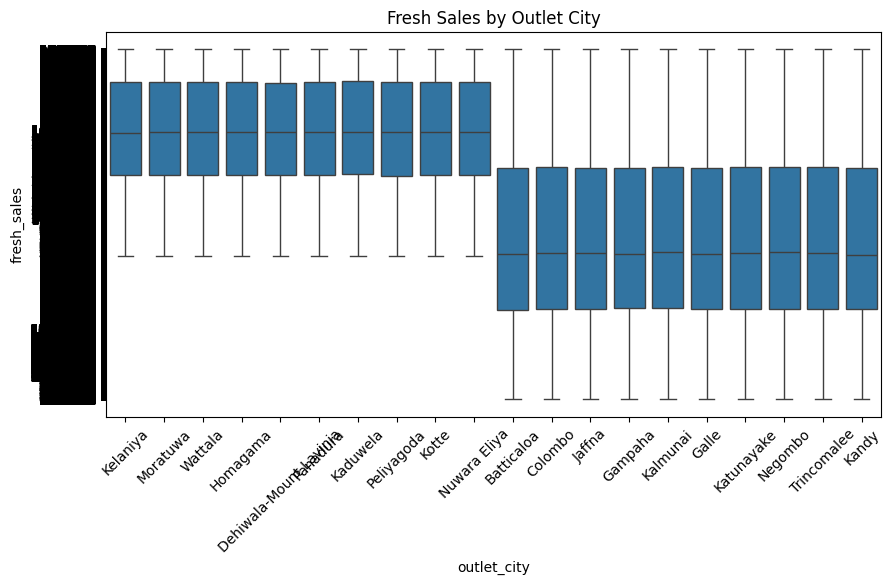

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='outlet_city', y='fresh_sales', data=df)
plt.title("Fresh Sales by Outlet City")
plt.xticks(rotation=45)
plt.show()

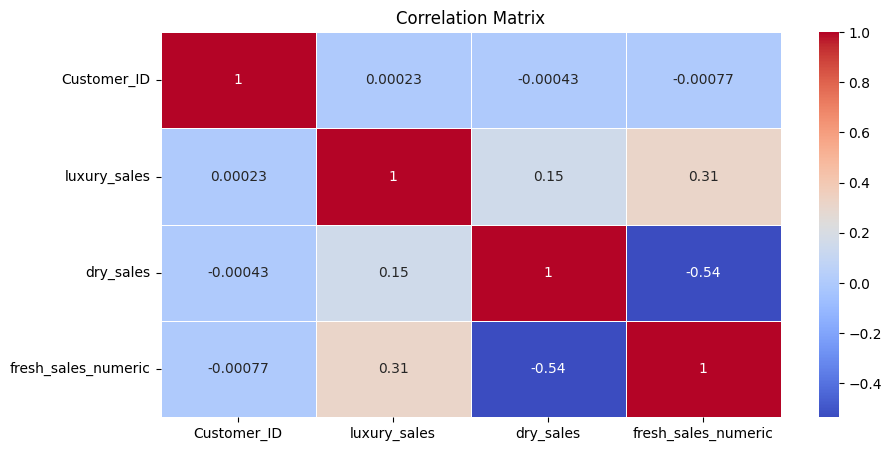

In [10]:
# Multivariate Analysis
plt.figure(figsize=(10, 5))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

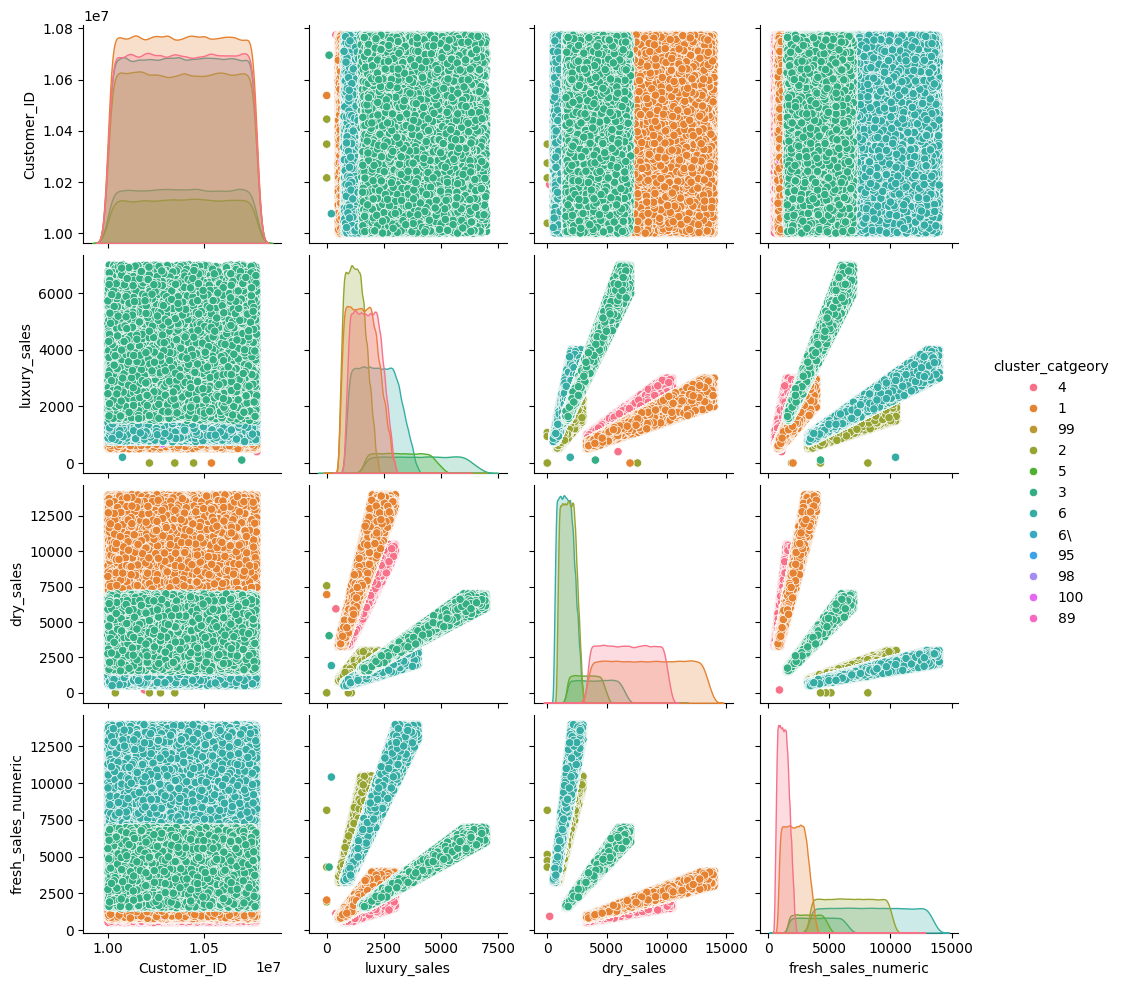

In [11]:
sns.pairplot(df, hue='cluster_catgeory')
plt.show()

TRAIN.CSV - PREPROCESSING AND EDA AFTER CLEANING

In [12]:
import pandas as pd

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df = pd.read_csv('/content/traincsv.csv',low_memory=False)

In [15]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756,5292,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [17]:
import pandas as pd

# Display first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Get summary statistics
print(df.describe())

   Customer_ID outlet_city luxury_sales fresh_sales dry_sales cluster_catgeory
0   10493832.0    Kelaniya       1209.6         756      5292                4
1   10178643.0    Moratuwa      1590.12     1060.08   6007.12                1
2   10513916.0     Wattala      2288.88     1481.04   9155.52                4
3   10334589.0     Wattala      2274.94     1739.66   9099.76                4
4   10458365.0    Kelaniya      2345.49     2069.55   9243.99                4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
me

In [18]:
print(df.isnull().sum())

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64


In [19]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Fill missing values with appropriate strategy
df.fillna(method='ffill', inplace=True)  # Forward fill (or use mean/median)

# Option 2: Drop missing values if they are not significant
df.dropna(inplace=True)

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64


<ipython-input-19-c2e95a0d4967>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill (or use mean/median)


In [20]:
# Check for missing values
print(df.isnull().sum())

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


In [21]:
# Convert Customer_ID to integer
df['Customer_ID'] = df['Customer_ID'].astype('int64')

# Check if 'outlet_city' column exists before converting
if 'outlet_city' in df.columns:
    # Convert categorical columns
    df['outlet_city'] = df['outlet_city'].astype('category')
else:
    print("Column 'outlet_city' not found in the DataFrame.")
    # Handle the missing column

In [22]:
import pandas as pd
import numpy as np

# Function to convert non-numeric values to NaN
def clean_numeric(column):
    return pd.to_numeric(column, errors='coerce')  # Converts invalid values to NaN

# Apply the function to all three sales columns
df['luxury_sales'] = clean_numeric(df['luxury_sales'])
df['fresh_sales'] = clean_numeric(df['fresh_sales'])
df['dry_sales'] = clean_numeric(df['dry_sales'])

# Optionally, fill or remove NaN values
df.dropna(subset=['luxury_sales', 'fresh_sales', 'dry_sales'], inplace=True)  # Removes rows with NaN
# Or use df.fillna(0) to replace NaNs with 0

# Verify changes
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 774133 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       774133 non-null  int64   
 1   outlet_city       774133 non-null  category
 2   luxury_sales      774133 non-null  float64 
 3   fresh_sales       774133 non-null  float64 
 4   dry_sales         774133 non-null  float64 
 5   cluster_catgeory  774133 non-null  object  
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 36.2+ MB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243.99   

  cluster_cat

In [23]:
print(df.isnull().sum())

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


In [24]:
import numpy as np

# Identify outliers using IQR
Q1 = df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.25)
Q3 = df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[['luxury_sales', 'fresh_sales', 'dry_sales']] < (Q1 - 1.5 * IQR)) |
          (df[['luxury_sales', 'fresh_sales', 'dry_sales']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [26]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 739070 entries, 0 to 774150
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       739070 non-null  int64   
 1   outlet_city       739070 non-null  category
 2   luxury_sales      739070 non-null  float64 
 3   fresh_sales       739070 non-null  float64 
 4   dry_sales         739070 non-null  float64 
 5   cluster_catgeory  739070 non-null  object  
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 34.5+ MB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243.99   

  cluster_cat

In [27]:
# Check unique values in cluster_category
print("Unique values in cluster_category:", df['cluster_catgeory'].unique())

Unique values in cluster_category: ['4' '1' '99' '2' '5' '3' '6' '6\\' '95' '98' '100' '89']


In [28]:
import pandas as pd

# Convert cluster_category to numeric (handling mixed types)
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

# Keep only values between 1 and 6
df = df[df['cluster_catgeory'].between(0, 6)]

# Convert to integer type
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

# Verify changes
print("Unique values after cleaning:", df['cluster_catgeory'].unique())
print(df.info())
print(df.head())

Unique values after cleaning: [4 1 2 5 3 6]
<class 'pandas.core.frame.DataFrame'>
Index: 739064 entries, 0 to 774150
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       739064 non-null  int64   
 1   outlet_city       739064 non-null  category
 2   luxury_sales      739064 non-null  float64 
 3   fresh_sales       739064 non-null  float64 
 4   dry_sales         739064 non-null  float64 
 5   cluster_catgeory  739064 non-null  int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 34.5 MB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069

<ipython-input-28-6c0d68650ad5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)


In [29]:
df['cluster_catgeory'].unique()

array([4, 1, 2, 5, 3, 6])

In [30]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')



# Assuming 'df' is your preprocessed DataFrame
file_path = "/content/drive/My Drive/preprocessed_data.csv"

# Save DataFrame as CSV
df.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to /content/drive/My Drive/preprocessed_data.csv


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load the dataset
df = pd.read_csv("/content/preprocessed_data (3).csv")

In [42]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426950 entries, 0 to 426949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       426950 non-null  int64  
 1   outlet_city       426950 non-null  object 
 2   luxury_sales      426950 non-null  float64
 3   fresh_sales       426950 non-null  float64
 4   dry_sales         426949 non-null  float64
 5   cluster_catgeory  426949 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 19.5+ MB
None
        Customer_ID   luxury_sales    fresh_sales      dry_sales  \
count  4.269500e+05  426950.000000  426950.000000  426949.000000   
mean   1.038728e+07    1609.598239    3507.793249    4936.915906   
std    2.236392e+05     642.351580    2788.510911    3225.591311   
min    1.000000e+07     500.000000      10.000000     750.150000   
25%    1.019339e+07    1115.490000    1296.000000    2010.200000   
50%    1.038743e+07    1520.29

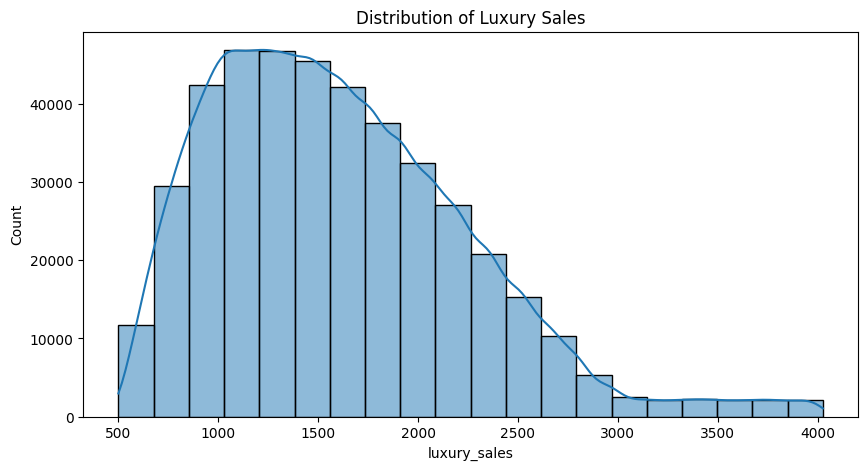

In [43]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['luxury_sales'], bins=20, kde=True)
plt.title("Distribution of Luxury Sales")
plt.show()

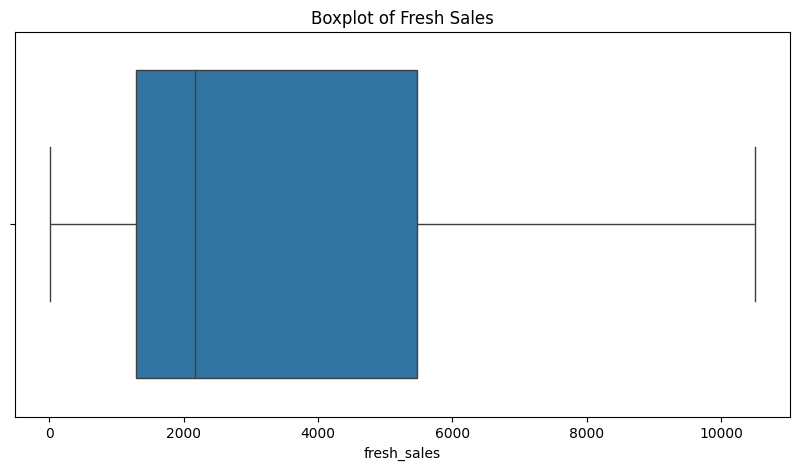

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fresh_sales'])
plt.title("Boxplot of Fresh Sales")
plt.show()

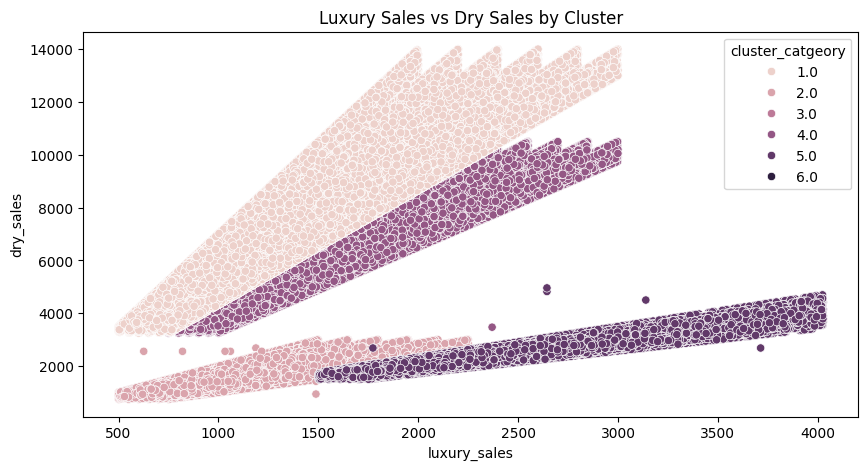

In [45]:
# Bivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['luxury_sales'], y=df['dry_sales'], hue=df['cluster_catgeory'])
plt.title("Luxury Sales vs Dry Sales by Cluster")
plt.show()

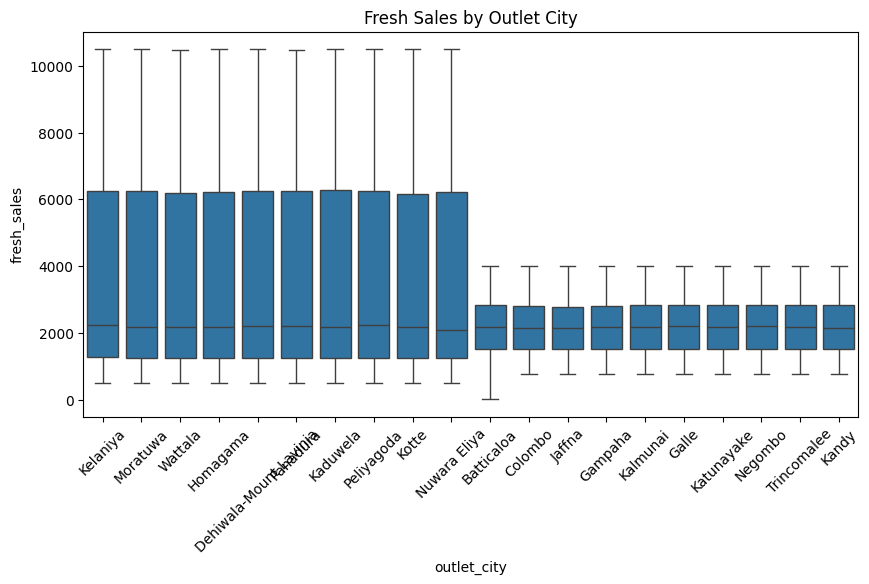

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='outlet_city', y='fresh_sales', data=df)
plt.title("Fresh Sales by Outlet City")
plt.xticks(rotation=45)
plt.show()

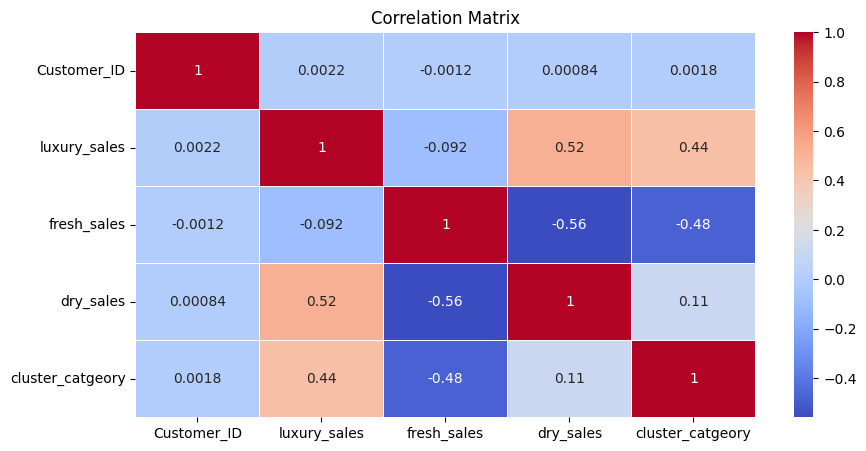

In [47]:
# Multivariate Analysis
plt.figure(figsize=(10, 5))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

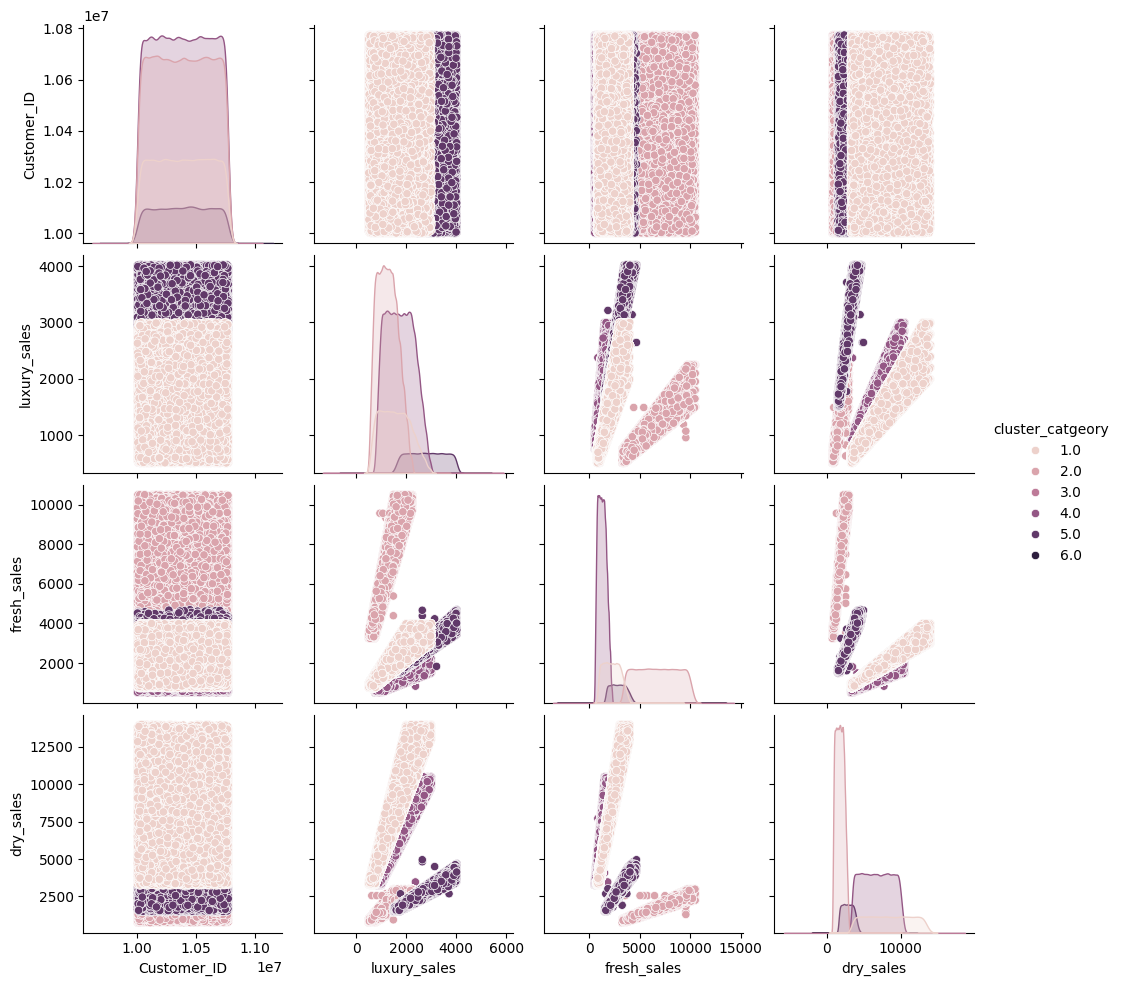

In [48]:
sns.pairplot(df, hue='cluster_catgeory')
plt.show()

FEATURE ENGINEERING AND CLUSTER NAMING

In [49]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Variable ('outlet_city') using Label Encoding
encoder = LabelEncoder()
df['outlet_city_encoded'] = encoder.fit_transform(df['outlet_city'])

In [50]:
# Concatenate encoded columns and drop original
df.drop(columns=['outlet_city'], inplace=True)

In [51]:
# Scaling Sales Columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sales_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']
df[sales_columns] = scaler.fit_transform(df[sales_columns])

In [52]:
# Display final processed dataset
print(df.head())

   Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
0     10493832     -0.622710    -0.986834   0.110084               4.0   
1     10178643     -0.030323    -0.877786   0.331786               1.0   
2     10513916      1.057493    -0.726824   1.307856               4.0   
3     10334589      1.035792    -0.634079   1.290569               4.0   
4     10458365      1.145623    -0.515775   1.335284               4.0   

   outlet_city_encoded  
0                   11  
1                   13  
2                   19  
3                   19  
4                   11  


In [55]:
# Save the processed dataset
df.to_csv("/content/processed_data.csv", index=False)

In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
# Use the scaled sales columns from your DataFrame for clustering
scaled_data = df[['luxury_sales', 'fresh_sales', 'dry_sales']]
df['cluster'] = kmeans.fit_predict(scaled_data)

<ipython-input-65-c6b1b96464d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df, palette='Set2')


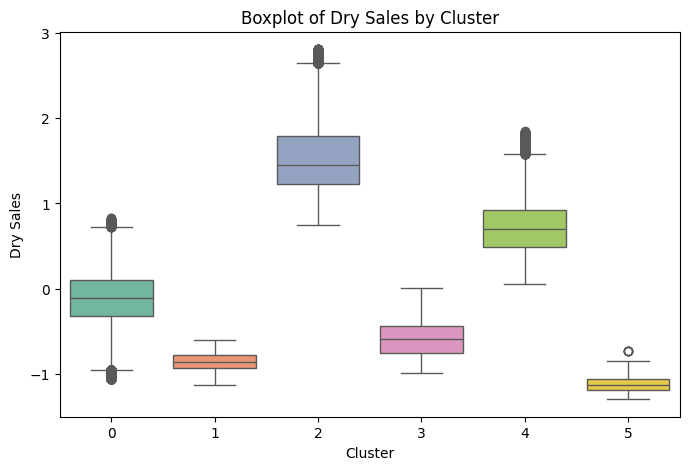

<ipython-input-65-c6b1b96464d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df, palette='Set2')


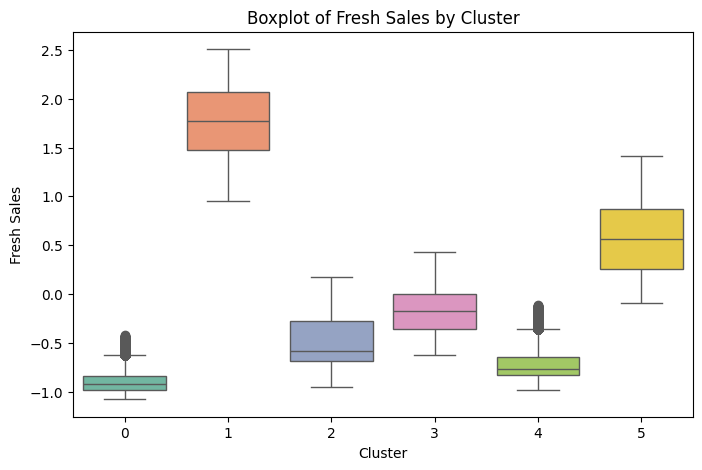

<ipython-input-65-c6b1b96464d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df, palette='Set2')


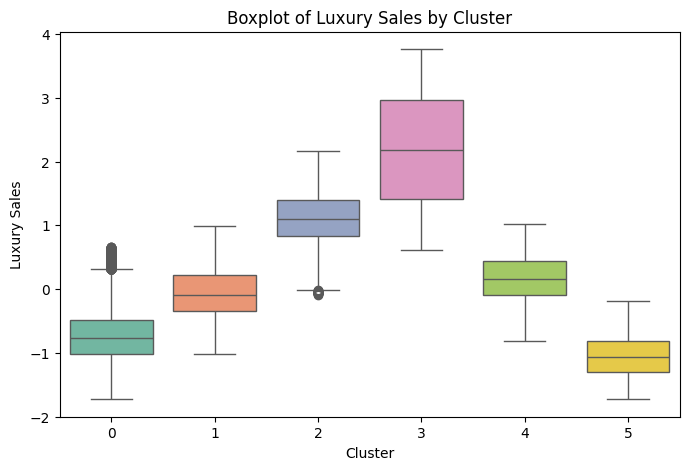

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_columns = ['dry_sales', 'fresh_sales', 'luxury_sales']

for col in sales_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='cluster', y=col, data=df, palette='Set2')
    plt.title(f'Boxplot of {col.replace("_", " ").title()} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col.replace("_", " ").title())
    plt.show()

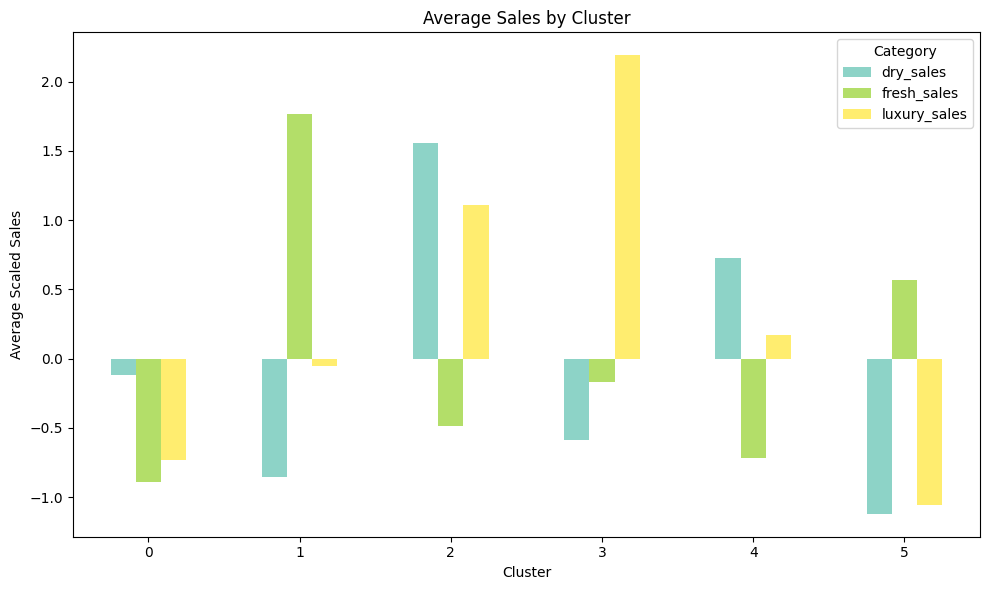

In [66]:
import pandas as pd

# Group and plot
cluster_avg = df.groupby('cluster')[sales_columns].mean()

cluster_avg.plot(kind='bar', figsize=(10,6), colormap='Set3')
plt.title('Average Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Scaled Sales')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

<ipython-input-68-b6e463893e2b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='pastel')


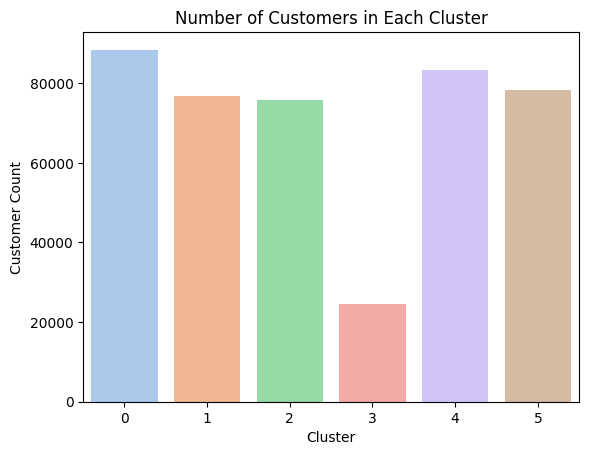

In [68]:
sns.countplot(x='cluster', data=df, palette='pastel')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Count')
plt.show()

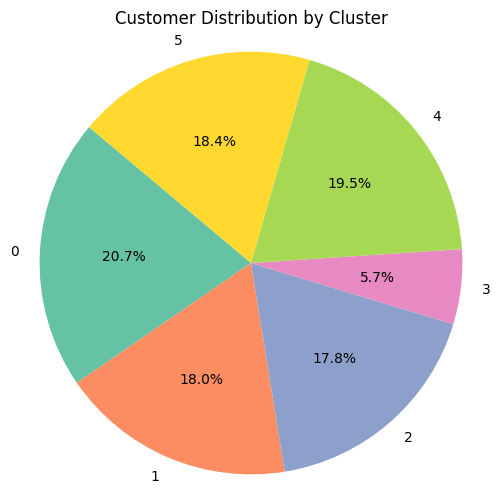

In [69]:
cluster_counts = df['cluster'].value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Customer Distribution by Cluster')
plt.axis('equal')
plt.show()

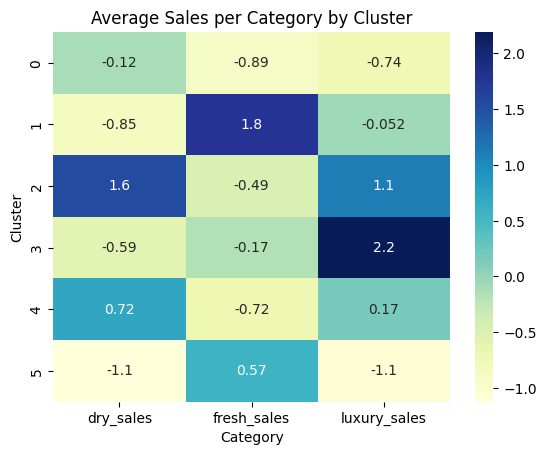

In [70]:
sns.heatmap(cluster_avg, annot=True, cmap='YlGnBu')
plt.title('Average Sales per Category by Cluster')
plt.xlabel('Category')
plt.ylabel('Cluster')
plt.show()

In [71]:
cluster_avg = df.groupby('cluster')[['dry_sales', 'fresh_sales', 'luxury_sales']].mean()
print(cluster_avg)

         dry_sales  fresh_sales  luxury_sales
cluster                                      
0        -0.121062    -0.890210     -0.736016
1        -0.852299     1.768617     -0.051654
2         1.556574    -0.490179      1.108947
3        -0.591725    -0.171017      2.190736
4         0.724650    -0.721252      0.172109
5        -1.121270     0.567155     -1.058750


In [72]:
cluster_labels = {
    0: "Steady Shoppers",
    1: "Elite Spenders",
    2: "Occasional Buyers",
    3: "Everyday Buyers",
    4: "Loyal Shoppers",
    5: "Budget-Conscious"
}

df['segment'] = df['cluster'].map(cluster_labels)

<ipython-input-73-6c129991913d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segment', y=col, data=df, palette='Set2')


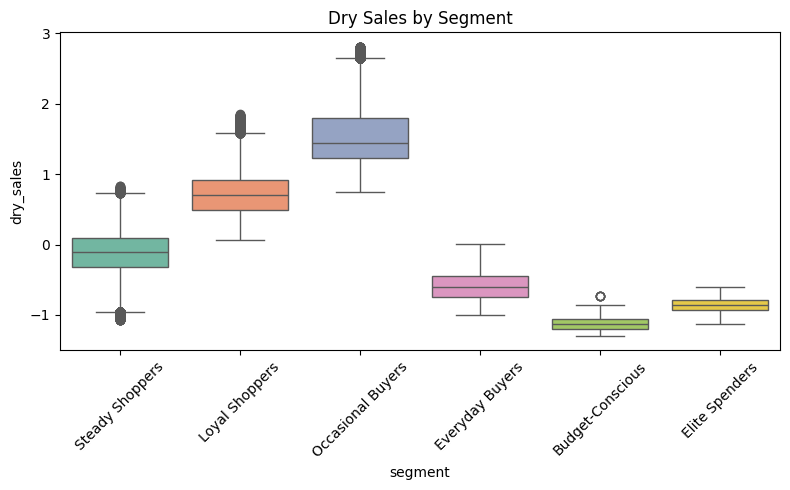

<ipython-input-73-6c129991913d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segment', y=col, data=df, palette='Set2')


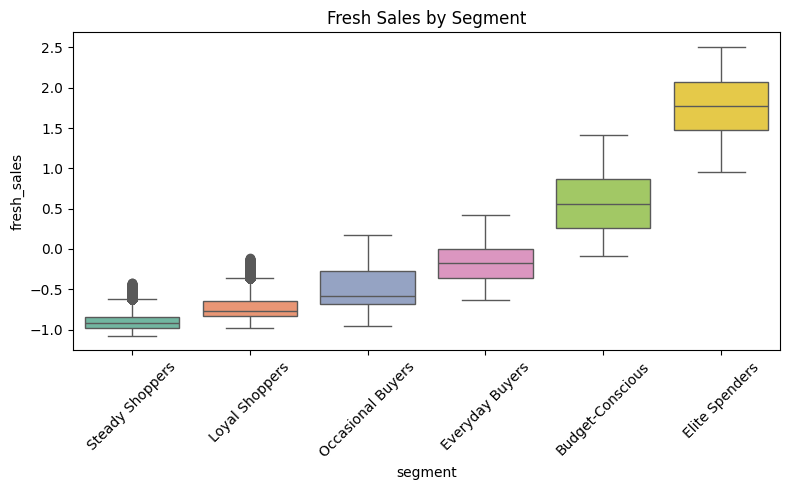

<ipython-input-73-6c129991913d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segment', y=col, data=df, palette='Set2')


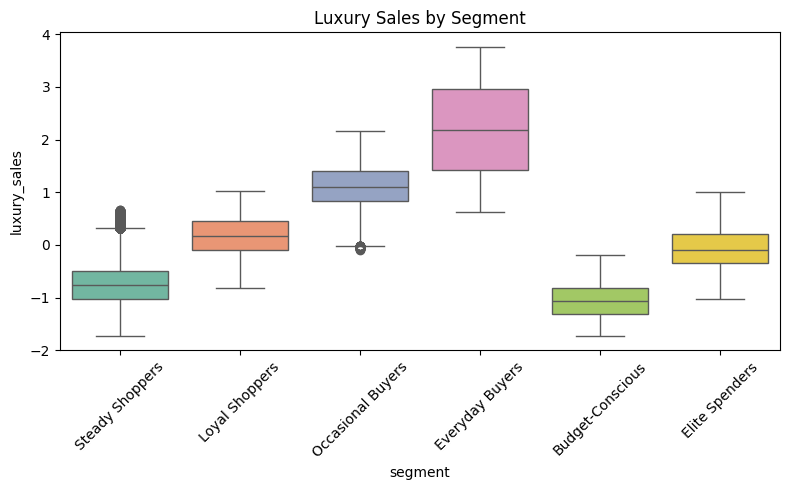

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['dry_sales', 'fresh_sales', 'luxury_sales']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='segment', y=col, data=df, palette='Set2')
    plt.title(f'{col.replace("_", " ").title()} by Segment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()